# Importing the libaries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Downloading the dataset
## 2. Loading the dataset into the tool

In [2]:
#Importing the dataset
data = pd.read_csv('abalone.csv')

In [3]:
#Printing the top first data lables and values
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 3. visualization
### Univariate Analysis

(array([1528.,    0.,    0.,    0.,    0., 1307.,    0.,    0.,    0.,
        1342.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

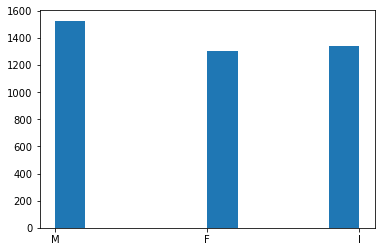

In [4]:
plt.hist(data['Sex'])

### Bivariate Analysis

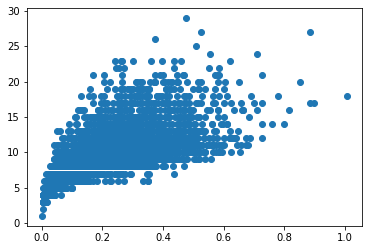

In [5]:
plt.scatter(data['Shell weight'],data['Rings'])

### Multivariate Analysis

In [ ]:
sns.pairplot(data,hue='Sex')

## 4. Descriptive Statistics 

In [9]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## 5. Checking for missing values



In [21]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

The above result shows there are no null values in the lables of the data

##6. Finding the outliers and replacing them

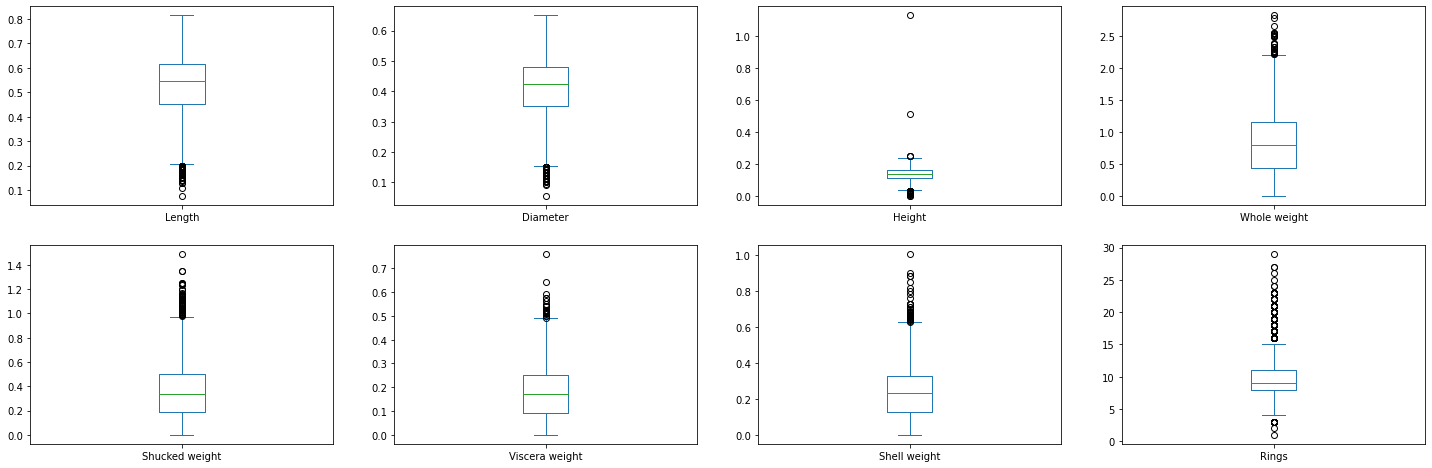

In [22]:
data.plot(kind="box",subplots=True,layout=(7,4),figsize=(25,30));

**Quantiles** are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities, or dividing the observations in a sample

In [23]:
qnt=data.quantile(q=[0.25,0.75])
qnt

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0


In [24]:
iqr=qnt.loc[0.75]-qnt.loc[0.25] 
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

In [25]:
lower=qnt.loc[0.25]-(1.5*iqr)
lower

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64

In [26]:
upper=qnt.loc[0.75]+(1.5*iqr)
upper

Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64

In [27]:
data.mean()

C:\Users\jeeva\AppData\Local\Temp/ipykernel_25592/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

#### Length

In [28]:
data['Length']=np.where(data['Length']< 0.22,0.53,data['Length'])

<AxesSubplot:xlabel='Length'>

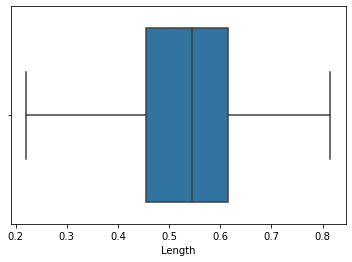

In [29]:
sns.boxplot(x=data['Length'])

#### Diameter

In [30]:
data['Diameter']=np.where(data['Diameter']< 0.155,0.407,data['Diameter'])

<AxesSubplot:xlabel='Diameter'>

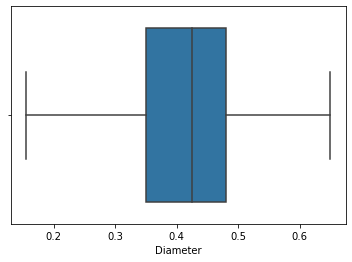

In [31]:
sns.boxplot(x=data['Diameter'])

#### Height

In [32]:
data['Height']=np.where(data['Height']< 0.04,0.14,data['Height'])

<AxesSubplot:xlabel='Height'>

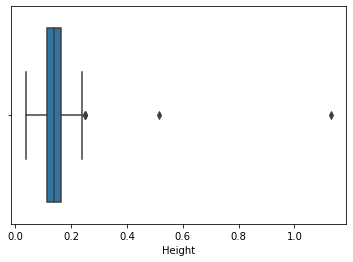

In [33]:
sns.boxplot(x=data['Height'])

<AxesSubplot:xlabel='Height'>

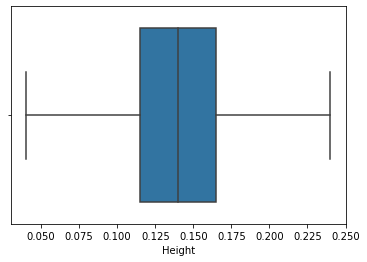

In [34]:
data['Height']=np.where(data['Height']>0.24,0.14,data['Height'])
sns.boxplot(x=data['Height'])

#### Whole weight

<AxesSubplot:xlabel='Whole weight'>

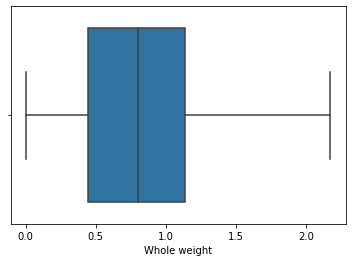

In [35]:
data['Whole weight']=np.where(data['Whole weight']>2.18,0.83,data['Whole weight'])
sns.boxplot(x=data['Whole weight'])

#### Viscera weight

<AxesSubplot:xlabel='Viscera weight'>

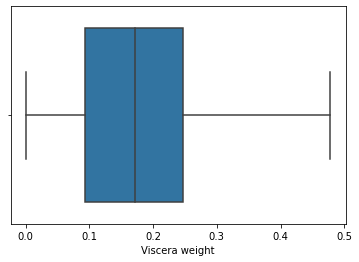

In [36]:
data['Viscera weight']=np.where(data['Viscera weight']>0.478,0.18,data['Viscera weight'])
sns.boxplot(x=data['Viscera weight'])

#### Shell weight

<AxesSubplot:xlabel='Shell weight'>

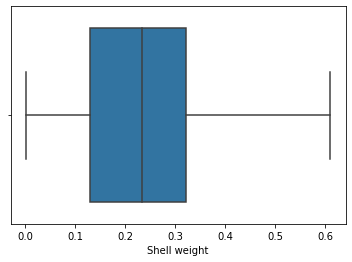

In [37]:
data['Shell weight']=np.where(data['Shell weight']>0.61,0.238831,data['Shell weight'])
sns.boxplot(x=data['Shell weight'])

#### Rings

<AxesSubplot:xlabel='Rings'>

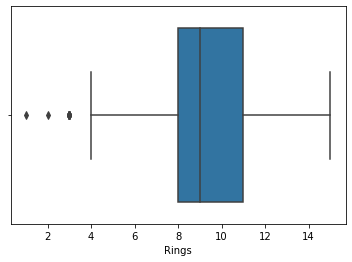

In [38]:
data['Rings']=np.where(data['Rings']>15.5,9.933684,data['Rings'])
sns.boxplot(x=data['Rings'])

<AxesSubplot:xlabel='Rings'>

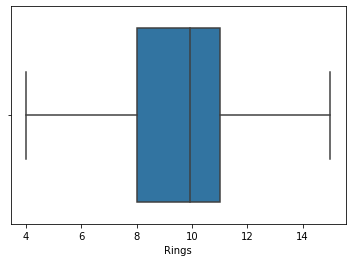

In [39]:
data['Rings']=np.where(data['Rings']<3.5,9.933684,data['Rings'])
sns.boxplot(x=data['Rings'])

Length               AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Diameter          AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Height            AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Whole weight      AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
Shucked weight       AxesSubplot(0.125,0.677439;0.168478x0.0920732)
Viscera weight    AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Shell weight      AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
Rings             AxesSubplot(0.731522,0.677439;0.168478x0.0920732)
dtype: object

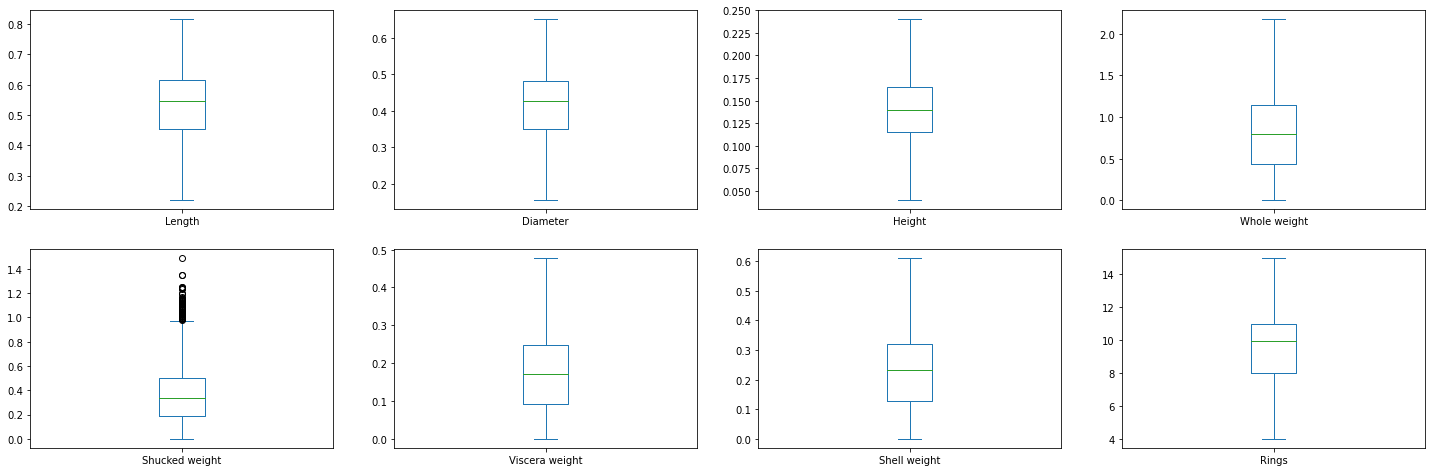

In [40]:
data.plot(kind="box",subplots=True,layout=(7,4),figsize=(25,30))

## 7. Check for Categorical Columns and perform encoding

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [42]:
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

In [43]:
df=pd.get_dummies(data,columns=['Sex'])
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0,1,0


##8. Split the data into dependent and independent variables

At first, the data is splitted as dependent variable initially

In [44]:
y = df['Rings'].values
y

array([15.,  7.,  9., ...,  9., 10., 12.])

Here then the data is splitted as independent variables

In [45]:
x=df.drop(columns=['Rings'],axis=1).values
x

array([[0.455, 0.365, 0.095, ..., 0.   , 0.   , 1.   ],
       [0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

## 9. Scale the independent variables

In [46]:
from sklearn.preprocessing import scale

Scaling the independent variables

In [47]:
x = scale(x)
x

array([[-0.66489959, -0.50167301, -1.19856285, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.60274931, -1.57291477, -1.332413  , ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.00499306,  0.08750996, -0.12776168, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6302262 ,  0.67669293,  1.74614038, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.85352375,  0.78381711,  0.27378876, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.61273542,  1.53368634,  1.47844008, ..., -0.67483383,
        -0.68801788,  1.31667716]])

##10. Split the data into training and testing

Spitting is done in the data for to terminate the overfitting instance

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

##11. Build the model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
LR_data = LinearRegression()

##12. Train the model

In [51]:
LR_data.fit(x_train,y_train)

LinearRegression()

##13. Test the model

In [52]:
y_predict = LR_data.predict(x_test)
y_predict

array([11.08228223,  8.56966884, 10.32030044,  5.81176543, 10.55729215,
       10.9994349 ,  8.54001942,  9.53485842,  7.94863295, 10.77269024,
        8.19215121,  6.52908683,  8.66850868,  9.2973361 ,  6.01083471,
        9.75914873,  8.11101851, 11.75022898, 10.81483963,  7.73496842,
        7.41053314,  6.74781725,  8.23953132,  8.11840717,  8.89522864,
       10.57559174,  9.72037664, 11.28706181,  9.43312716, 10.14641252,
        8.39316234,  8.8039055 , 10.9525804 , 12.02522277,  7.53517987,
        9.32949791,  8.40188368, 10.50939368,  8.09904951, 10.79586419,
       10.94929657,  9.46697917, 10.48376606, 10.50144385, 11.1670716 ,
        9.38225325,  9.91895083, 11.53682606, 10.27297441,  7.61410868,
       10.4713174 ,  7.20448532,  9.03017812, 11.356673  ,  9.55456045,
        8.5018384 ,  7.09159514,  7.94693174,  7.21751933,  6.98757808,
        9.94698656,  9.80099511, 10.09841352,  8.00855471,  7.61817453,
       11.14757173, 11.61734435, 11.55164769,  8.66917205, 12.04

##14. Measure the performance using Metrics
Here, we are measuring the performance using one of the regression metrics such as r2_score

We are performing the metrics analysis using the following regression metrics
- R2 Score 
- Mean Absolute Percentage Error
- Mean Poisson Deviance
- Mean Pinboll Loss

#### R2 Score

In [55]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_predict)
score

0.49114302349711947

From the above R2 Score, it is less than 1.0 which means that all predictions matches the expected values exactly.

#### Mean Absolute Percentage Error

In [57]:
from sklearn.metrics import mean_absolute_percentage_error
MSE = mean_absolute_percentage_error(y_test,y_predict)
MSE

0.14763939100754475

Also by checking the performance using Mean Absolute Percentage Error above,we can see that the prediction is under 1.0 value. Hence, the prediction succeeds

#### Mean Poisson Deviance

In [59]:
from sklearn.metrics import mean_poisson_deviance
MPD = mean_poisson_deviance(y_test,y_predict)
MPD

0.29797936844250794

It results under 1.0 for Mean Poisson Deviance also as accurate at prediction

#### Mean Pinball Loss

In [69]:
from sklearn.metrics import mean_pinball_loss
pinball_score = mean_pinball_loss(y_test,y_predict)
pinball_score

ImportError: cannot import name 'mean_pinball_loss' from 'sklearn.metrics' (C:\Users\jeeva\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

It is good for mean_pinball_loss also in prediction

In [65]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0,1,0


In [67]:
LR_data.predict([[0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0,0,1]])

array([9.71316948])